In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

test = pd.read_csv('..\source\pred.csv')
test

,DateTime,Open,Close,Predicted
0,2021-01-08,580.0,580.0,528.544495
1,2021-01-11,577.0,584.0,535.721558
2,2021-01-12,583.0,591.0,542.865295
3,2021-01-13,595.0,605.0,551.164612
4,2021-01-14,587.0,592.0,558.128052
...,...,...,...,...
481,2022-12-26,454.0,456.5,467.151581
482,2022-12-27,458.0,457.0,464.803101
483,2022-12-28,451.0,451.0,463.354889
484,2022-12-29,444.0,446.0,462.589172


In [2]:
test['fivemean'] = (test.Close.shift(1)+test.Close.shift(2)+test.Close.shift(3)+test.Close.shift(4)+test.Close)/5
test['fivemean']=test['fivemean'].fillna(test.Close)

test.loc[test.Close>=test.fivemean, "fivetoclose"]= 1
test.loc[test.Close<test.fivemean, "fivetoclose"]= 0
test['fivetoclose']=test['fivetoclose'].fillna(0).astype(int)


test

,DateTime,Open,Close,Predicted,fivemean,fivetoclose
0,2021-01-08,580.0,580.0,528.544495,580.0,1
1,2021-01-11,577.0,584.0,535.721558,584.0,1
2,2021-01-12,583.0,591.0,542.865295,591.0,1
3,2021-01-13,595.0,605.0,551.164612,605.0,1
4,2021-01-14,587.0,592.0,558.128052,590.4,1
...,...,...,...,...,...,...
481,2022-12-26,454.0,456.5,467.151581,459.2,0
482,2022-12-27,458.0,457.0,464.803101,459.1,0
483,2022-12-28,451.0,451.0,463.354889,457.5,0
484,2022-12-29,444.0,446.0,462.589172,453.1,0


In [3]:
test['status'] = test.fivetoclose.shift(1).fillna(0).astype(int)


# .shift(1)是前一個

test['buy_cost'] = test.Open[np.where((test.status == 1) * (test.status.shift(1) == 0))[0]]
test['sell_cost'] = test.Open[np.where((test.status == 0) * (test.status.shift(1) == 1))[0]]
test

,DateTime,Open,Close,Predicted,fivemean,fivetoclose,status,buy_cost,sell_cost
0,2021-01-08,580.0,580.0,528.544495,580.0,1,0,NaN,NaN
1,2021-01-11,577.0,584.0,535.721558,584.0,1,1,577.0,NaN
2,2021-01-12,583.0,591.0,542.865295,591.0,1,1,NaN,NaN
3,2021-01-13,595.0,605.0,551.164612,605.0,1,1,NaN,NaN
4,2021-01-14,587.0,592.0,558.128052,590.4,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
481,2022-12-26,454.0,456.5,467.151581,459.2,0,0,NaN,454.0
482,2022-12-27,458.0,457.0,464.803101,459.1,0,0,NaN,NaN
483,2022-12-28,451.0,451.0,463.354889,457.5,0,0,NaN,NaN
484,2022-12-29,444.0,446.0,462.589172,453.1,0,0,NaN,NaN


In [4]:
test = test.fillna(0)
buy_cost = np.array(test.buy_cost[test.buy_cost != 0])
sell_price = np.array(test.sell_cost[test.sell_cost != 0])
buy_cost

array([577. , 629. , 609. , 615. , 599. , 615. , 612. , 605. , 596. ,
       571. , 587. , 602. , 598. , 590. , 600. , 592. , 581. , 594. ,
       596. , 579. , 623. , 600. , 582. , 604. , 597. , 598. , 592. ,
       600. , 615. , 605. , 614. , 605. , 601. , 606. , 657. , 643. ,
       646. , 644. , 581. , 582. , 602. , 577. , 571. , 538. , 543. ,
       521. , 533. , 538. , 538. , 501. , 496. , 470. , 466. , 509. ,
       510. , 515. , 497. , 495. , 495. , 473.5, 444.5, 400. , 404. ,
       379.5, 388.5, 395. , 494.5, 490. , 476.5, 476. , 457.5])

In [5]:
if len(buy_cost) > len(sell_price) :
    buy_cost = buy_cost[:-1]

trade_return = sell_price / buy_cost - 1
fee = 0.002
net_trade_return = trade_return - fee

In [6]:
test['trade_ret'] = 0
test['net_trade_ret'] = 0
sell_dates = test.sell_cost[test.sell_cost != 0].index
test.loc[sell_dates, 'trade_ret'] = trade_return
test.loc[sell_dates, 'net_trade_ret'] = net_trade_return
test

,DateTime,Open,Close,Predicted,fivemean,fivetoclose,status,buy_cost,sell_cost,trade_ret,net_trade_ret
0,2021-01-08,580.0,580.0,528.544495,580.0,1,0,0.0,0.0,0.00000,0.00000
1,2021-01-11,577.0,584.0,535.721558,584.0,1,1,577.0,0.0,0.00000,0.00000
2,2021-01-12,583.0,591.0,542.865295,591.0,1,1,0.0,0.0,0.00000,0.00000
3,2021-01-13,595.0,605.0,551.164612,605.0,1,1,0.0,0.0,0.00000,0.00000
4,2021-01-14,587.0,592.0,558.128052,590.4,1,1,0.0,0.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
481,2022-12-26,454.0,456.5,467.151581,459.2,0,0,0.0,454.0,-0.00765,-0.00965
482,2022-12-27,458.0,457.0,464.803101,459.1,0,0,0.0,0.0,0.00000,0.00000
483,2022-12-28,451.0,451.0,463.354889,457.5,0,0,0.0,0.0,0.00000,0.00000
484,2022-12-29,444.0,446.0,462.589172,453.1,0,0,0.0,0.0,0.00000,0.00000


In [7]:
test['open_ret'] = test.Open / test.Open.shift(1) - 1
test['strategy_ret'] = test.status.shift(1) * test.open_ret
test['strategy_net_ret'] = test.strategy_ret
test.loc[sell_dates, 'strategy_net_ret'] = test.loc[sell_dates, 'strategy_net_ret'] - fee
test = test.fillna(0)

In [8]:
test['buy_and_hold_equity'] = (test.open_ret + 1).cumprod()
test['strategy_equity'] = (test.strategy_ret + 1).cumprod()
test['strategy_net_equity'] = (test.strategy_net_ret + 1).cumprod()
test

,DateTime,Open,Close,Predicted,fivemean,fivetoclose,status,buy_cost,sell_cost,trade_ret,net_trade_ret,open_ret,strategy_ret,strategy_net_ret,buy_and_hold_equity,strategy_equity,strategy_net_equity
0,2021-01-08,580.0,580.0,528.544495,580.0,1,0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,2021-01-11,577.0,584.0,535.721558,584.0,1,1,577.0,0.0,0.00000,0.00000,-0.005172,-0.000000,-0.000000,0.994828,1.000000,1.000000
2,2021-01-12,583.0,591.0,542.865295,591.0,1,1,0.0,0.0,0.00000,0.00000,0.010399,0.010399,0.010399,1.005172,1.010399,1.010399
3,2021-01-13,595.0,605.0,551.164612,605.0,1,1,0.0,0.0,0.00000,0.00000,0.020583,0.020583,0.020583,1.025862,1.031196,1.031196
4,2021-01-14,587.0,592.0,558.128052,590.4,1,1,0.0,0.0,0.00000,0.00000,-0.013445,-0.013445,-0.013445,1.012069,1.017331,1.017331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2022-12-26,454.0,456.5,467.151581,459.2,0,0,0.0,454.0,-0.00765,-0.00965,-0.007650,-0.007650,-0.009650,0.782759,0.631266,0.546941
482,2022-12-27,458.0,457.0,464.803101,459.1,0,0,0.0,0.0,0.00000,0.00000,0.008811,0.000000,0.000000,0.789655,0.631266,0.546941
483,2022-12-28,451.0,451.0,463.354889,457.5,0,0,0.0,0.0,0.00000,0.00000,-0.015284,-0.000000,-0.000000,0.777586,0.631266,0.546941
484,2022-12-29,444.0,446.0,462.589172,453.1,0,0,0.0,0.0,0.00000,0.00000,-0.015521,-0.000000,-0.000000,0.765517,0.631266,0.546941


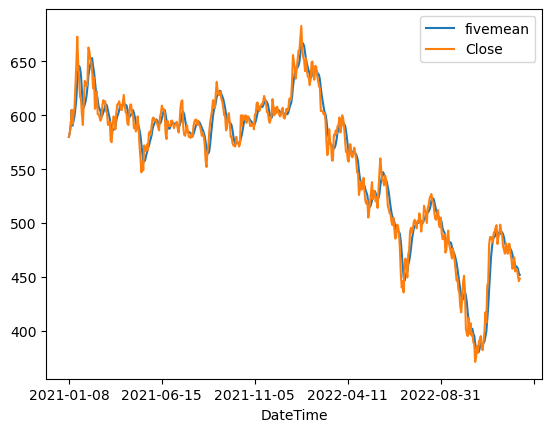

In [9]:
plot=test.plot(x='DateTime',y=['fivemean','Close'])
fig = plot.get_figure()

Text(0, 0.5, 'strategy_equity')

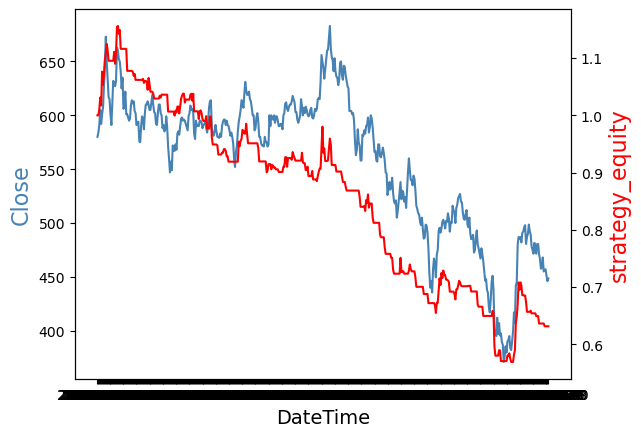

In [10]:
import matplotlib.pyplot as plt
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
fig2,ax = plt.subplots()
ax.plot(test.DateTime, test.Close, color=col1)
ax.set_xlabel('DateTime', fontsize=14)
ax.set_ylabel('Close', color=col1, fontsize=16)
ax2 = ax.twinx()
ax2.plot(test.DateTime, test.strategy_equity, color=col2)
ax2.set_ylabel('strategy_equity', color=col2, fontsize=16)